In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
from matplotlib.colorbar import ColorbarBase
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import folium
from folium.plugins import HeatMap



In [35]:
file_path = r"C:\Users\7J6594897\Desktop\complete_data.csv"
data = pd.read_csv(file_path)
data.head()

C:\Users\7J6594897\AppData\Local\Temp\ipykernel_33772\1026017601.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Close Date,SR Location,Street Number,...,County,State Plane X Coordinate,State Plane Y Coordinate,Latitude Coordinate,Longitude Coordinate,(Latitude.Longitude),Council District,Map Page,Map Tile,Predicted Category
0,19-00090956,Animal - Proper Care,Phone,Closed,11/23/2020 01:41:21 PM,03/14/2019 03:02:15 PM,11/23/2020 01:41:22 PM,11/23/2020 01:41:21 PM,"4609 RIBBECKE AVE, AUSTIN, TX 78721",4609.0,...,TRAVIS,3.132348e+06,1.007573e+07,30.280581,-97.685318,"(30.28058076, -97.68531793)",1.0,586L,MM23,Animal Services
1,20-00135805,Tree Issue ROW,Mobile Device,Closed,11/23/2020 12:02:05 AM,04/07/2020 07:06:32 PM,11/23/2020 12:02:05 AM,11/23/2020 12:02:05 AM,"3521 WEST AVE, AUSTIN, TX 78705",3521.0,...,TRAVIS,3.114174e+06,1.008341e+07,30.302857,-97.742312,"(30.30285681, -97.74231249)",9.0,555S,MJ25,Tree Issues ans trimming
2,20-00052942,Pothole Repair,Web,Closed,02/12/2020 12:57:35 PM,02/12/2020 01:55:04 AM,08/11/2020 01:03:41 AM,02/12/2020 12:57:35 PM,"7900 E BEN WHITE BLVD WB, AUSTIN, TX",7900.0,...,TRAVIS,3.131888e+06,1.005362e+07,30.219838,-97.688440,"(30.21983764, -97.68844011)",3.0,646F,ML18,Traffic and Road Infrastructure issues
3,19-00467964,ARR Dead Animal Collection,Phone,Closed,12/11/2019 09:57:54 AM,12/10/2019 02:17:04 PM,12/11/2019 09:57:54 AM,12/11/2019 09:57:54 AM,"7100 METROPOLIS DR, AUSTIN, TX 78744",7100.0,...,TRAVIS,3.127538e+06,1.004850e+07,30.206036,-97.702592,"(30.20603574, -97.70259216)",2.0,646N,ML17,Animal Services
4,19-00468033,Austin Code - Request Code Officer,Phone,Closed,12/10/2019 03:00:05 PM,12/10/2019 02:51:24 PM,12/11/2019 02:12:53 PM,12/10/2019 03:00:05 PM,"2401 GROVE BLVD, AUSTIN, TX 78741",2401.0,...,TRAVIS,3.125956e+06,1.005415e+07,30.221664,-97.707177,"(30.22166434, -97.70717698)",3.0,646A,ML18,Code Compliance


In [36]:
# Selecting only the specified columns
selected_columns = [
    "Service Request (SR) Number", "SR Description", "Method Received", 
    "SR Status", "Status Change Date", "Created Date", "Last Update Date", 
    "Latitude Coordinate", "Longitude Coordinate","Predicted Category"
]

cleaned_data = data[selected_columns]
# Display the first few rows of the cleaned dataset
cleaned_data.head()

,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Latitude Coordinate,Longitude Coordinate,Predicted Category
0,19-00090956,Animal - Proper Care,Phone,Closed,11/23/2020 01:41:21 PM,03/14/2019 03:02:15 PM,11/23/2020 01:41:22 PM,30.280581,-97.685318,Animal Services
1,20-00135805,Tree Issue ROW,Mobile Device,Closed,11/23/2020 12:02:05 AM,04/07/2020 07:06:32 PM,11/23/2020 12:02:05 AM,30.302857,-97.742312,Tree Issues ans trimming
2,20-00052942,Pothole Repair,Web,Closed,02/12/2020 12:57:35 PM,02/12/2020 01:55:04 AM,08/11/2020 01:03:41 AM,30.219838,-97.688440,Traffic and Road Infrastructure issues
3,19-00467964,ARR Dead Animal Collection,Phone,Closed,12/11/2019 09:57:54 AM,12/10/2019 02:17:04 PM,12/11/2019 09:57:54 AM,30.206036,-97.702592,Animal Services
4,19-00468033,Austin Code - Request Code Officer,Phone,Closed,12/10/2019 03:00:05 PM,12/10/2019 02:51:24 PM,12/11/2019 02:12:53 PM,30.221664,-97.707177,Code Compliance


In [37]:
# Convert 'Created Date' to datetime
cleaned_data['Created Date'] = pd.to_datetime(cleaned_data['Created Date'], errors='coerce')

cleaned_data = cleaned_data.sort_values('Created Date')
cleaned_data 

C:\Users\7J6594897\AppData\Local\Temp\ipykernel_33772\473386445.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cleaned_data['Created Date'] = pd.to_datetime(cleaned_data['Created Date'], errors='coerce')
C:\Users\7J6594897\AppData\Local\Temp\ipykernel_33772\473386445.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['Created Date'] = pd.to_datetime(cleaned_data['Created Date'], errors='coerce')


,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Latitude Coordinate,Longitude Coordinate,Predicted Category
882848,14-00000197,Dangerous/Vicious Dog Investigation,Phone,Closed,01/04/2014 12:18:52 PM,2014-01-01 01:45:50,01/04/2014 11:20:48 AM,30.348447,-97.777768,Animal Services
882481,14-00000230,Lost Item in Storm Drainage System,Phone,Closed,01/03/2014 07:40:49 AM,2014-01-01 03:02:45,01/03/2014 07:40:50 AM,30.268715,-97.745208,Waste Collection and Recycling
879060,14-00000261,Sign - Traffic Sign Maintenance,Phone,Closed,01/03/2014 06:57:22 AM,2014-01-01 04:25:34,01/03/2014 06:57:22 AM,30.375255,-97.704668,Traffic and Road Infrastructure issues
885458,14-00000268,Coyote Complaints,Phone,Closed,01/05/2014 07:43:52 AM,2014-01-01 04:54:56,01/05/2014 07:43:52 AM,30.249437,-97.893208,Traffic and Road Infrastructure issues
959563,14-00000294,Traffic Signal - Maintenance,Phone,Closed,07/23/2014 01:06:48 PM,2014-01-01 07:02:20,07/23/2014 01:06:49 PM,30.308985,-97.669068,Traffic and Road Infrastructure issues
...,...,...,...,...,...,...,...,...,...,...
1716411,23-00502272,APD - Non Emergency Noise/Alarm,Phone,Open,11/06/2023 10:44:18 PM,2023-11-06 22:44:18,11/06/2023 10:44:18 PM,30.265433,-97.718188,Code Compliance
1716412,23-00502274,APD - Non Emergency Noise/Alarm,Phone,Open,11/06/2023 11:03:25 PM,2023-11-06 23:03:25,11/06/2023 11:03:25 PM,30.242164,-97.730837,Code Compliance
1716413,23-00502276,APD - Non Emergency Noise/Alarm,Phone,Open,11/06/2023 11:13:14 PM,2023-11-06 23:13:14,11/06/2023 11:13:14 PM,30.427542,-97.707592,Code Compliance
1714373,23-00502281,APD - Non Emergency Noise/Alarm,Spot311 Interface,Open,11/06/2023 11:39:23 PM,2023-11-06 23:39:23,11/06/2023 11:39:23 PM,30.289084,-97.746954,Code Compliance


In [38]:
monthly_requests = cleaned_data .resample('M', on='Created Date').size()
# Convert the series to a dataframe for easier handling and reset the index
monthly_requests_df = monthly_requests.to_frame('Number of Service Requests').reset_index()

monthly_requests_df

,Created Date,Number of Service Requests
0,2014-01-31,8725
1,2014-02-28,7930
2,2014-03-31,9824
3,2014-04-30,11388
4,2014-05-31,10774
...,...,...
114,2023-07-31,26934
115,2023-08-31,28293
116,2023-09-30,27126
117,2023-10-31,26193


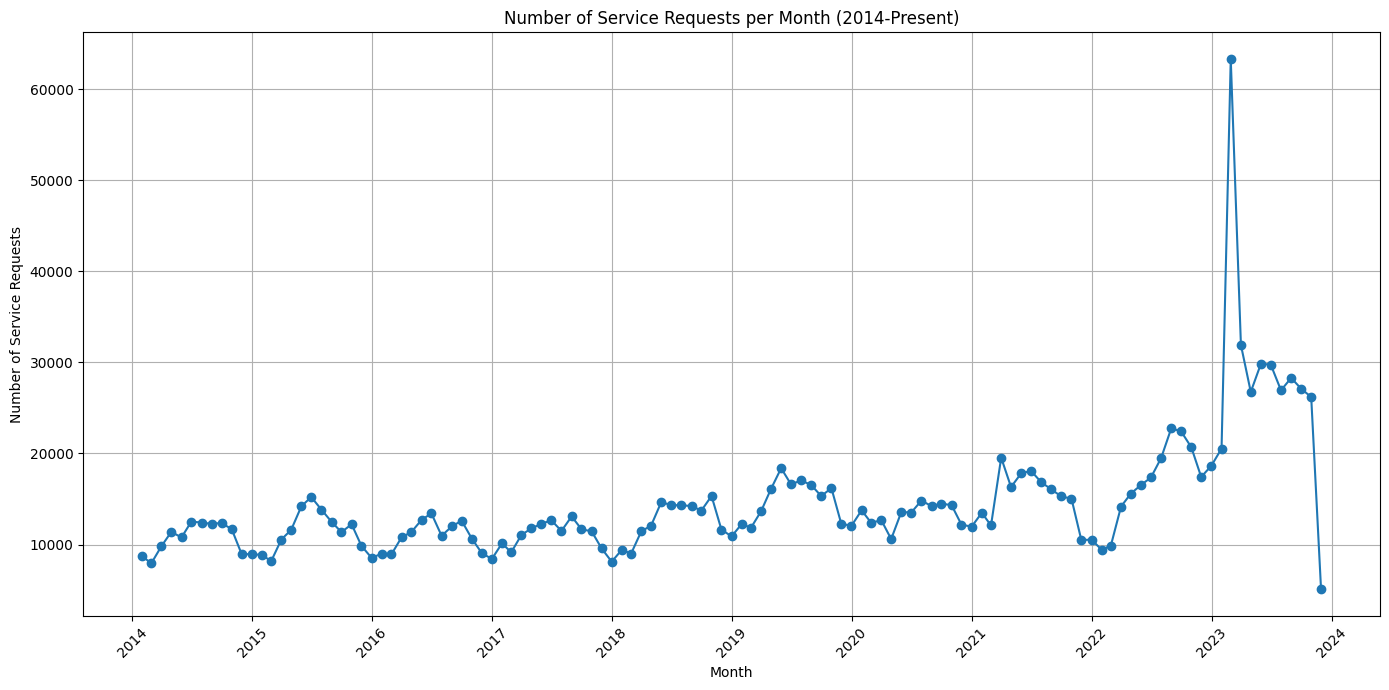

In [39]:
plt.figure(figsize=(14, 7))
plt.plot(monthly_requests_df['Created Date'], monthly_requests_df['Number of Service Requests'], marker='o')
plt.title('Number of Service Requests per Month (2014-Present)')
plt.xlabel('Month')
plt.ylabel('Number of Service Requests')
plt.grid(True)
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [40]:
# Step 1: Count Service Requests per Cluster
cluster_counts = cleaned_data['Predicted Category'].value_counts()

# Step 2: Create a DataFrame for the Counts
cluster_counts_df = cluster_counts.to_frame('Number of Service Requests').reset_index()

cluster_counts_df

,Predicted Category,Number of Service Requests
0,Traffic and Road Infrastructure issues,430777
1,Code Compliance,380380
2,Animal Services,356236
3,Waste Collection and Recycling,224583
4,Public Safety,89949
5,Tree Issues ans trimming,88446
6,other,55542
7,Parks and Recreation,52636
8,Shared Micromobility,37870


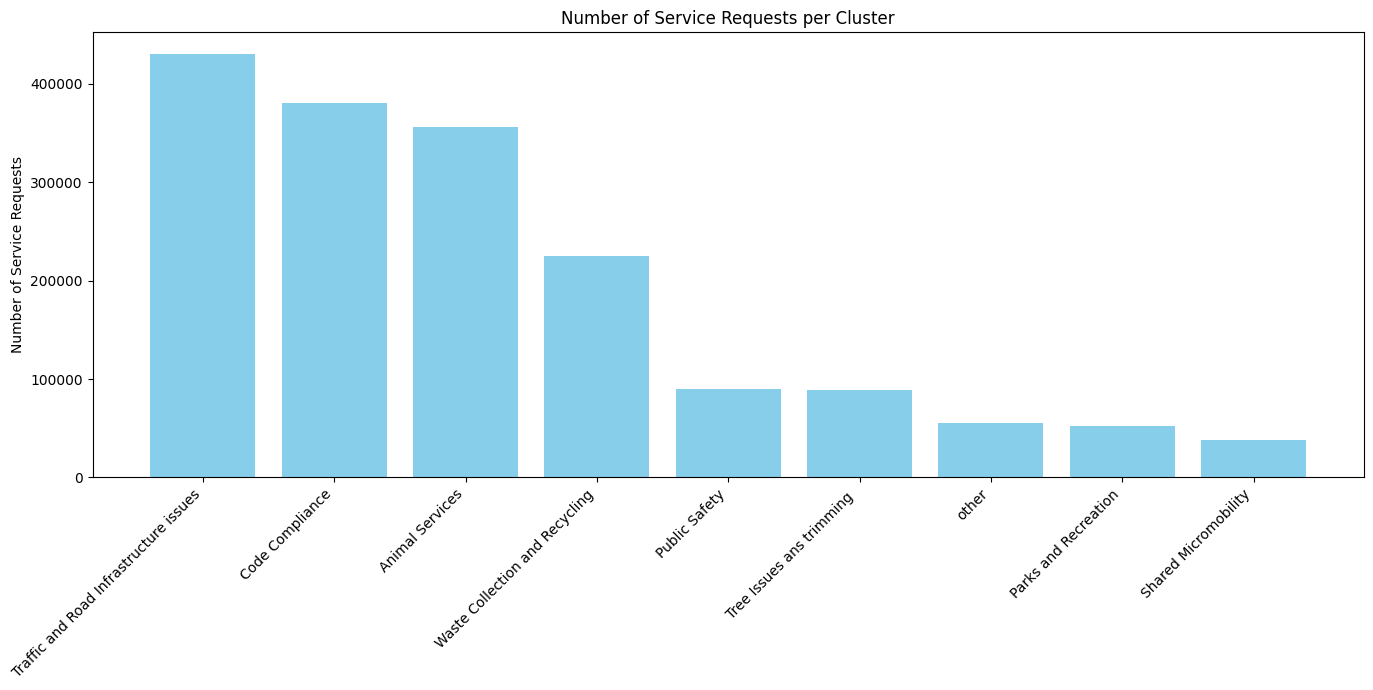

In [41]:
# Step 3: Plot the Bar Chart
plt.figure(figsize=(14, 7))
plt.bar(cluster_counts_df['Predicted Category'], cluster_counts_df['Number of Service Requests'], color='skyblue')
plt.title('Number of Service Requests per Cluster')
# Set the x-axis labels to be the cluster names
plt.xticks(ticks=range(len(cluster_counts_df)), labels=cluster_counts_df['Predicted Category'], rotation=45, ha='right')
plt.ylabel('Number of Service Requests')
plt.xticks(rotation=45)  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust the plot to ensure everything fits without overlapping
plt.show()

In [42]:
# Step 1: Filter Data for "Traffic and Road Infrastructure issues"
publicSafety_data = cleaned_data[cleaned_data['Predicted Category'] == 'Public Safety']
publicSafety_data

#only year 2021
publicSafety_data_2021 = publicSafety_data[publicSafety_data['Created Date'].dt.year == 2021]
publicSafety_data_2021

,Service Request (SR) Number,SR Description,Method Received,SR Status,Status Change Date,Created Date,Last Update Date,Latitude Coordinate,Longitude Coordinate,Predicted Category
282330,21-00000241,Austin Code - Coronavirus,Phone,Closed,01/02/2021 10:28:35 PM,2021-01-01 09:14:45,01/02/2021 10:28:35 PM,30.270023,-97.750447,Public Safety
270601,21-00000351,Community Connections - Coronavirus,Phone,Closed,01/04/2021 09:56:21 AM,2021-01-01 11:06:34,01/04/2021 09:56:21 AM,NaN,NaN,Public Safety
270620,21-00000419,Community Connections - Coronavirus,Phone,Closed,01/04/2021 12:11:34 PM,2021-01-01 12:10:05,01/04/2021 12:11:34 PM,NaN,NaN,Public Safety
270640,21-00000452,Community Connections - Coronavirus,Phone,Closed,01/04/2021 09:58:02 AM,2021-01-01 12:35:27,01/04/2021 09:58:02 AM,NaN,NaN,Public Safety
313029,21-00000461,Public Health - Graffiti Abatement,Phone,Closed,01/04/2021 10:08:34 AM,2021-01-01 12:42:32,01/04/2021 10:08:34 AM,30.274185,-97.716817,Public Safety
...,...,...,...,...,...,...,...,...,...,...
1348318,21-00569373,APH - Graffiti Abatement - Public Property,Spot311 Interface,Closed,10/03/2022 09:57:43 AM,2021-12-31 16:11:33,10/03/2022 09:57:43 AM,30.294841,-97.742209,Public Safety
1435194,21-00569434,APD - Vehicle Abatement Callback Request,Phone,Closed,10/31/2022 02:24:26 PM,2021-12-31 16:59:19,10/31/2022 02:24:25 PM,30.301643,-97.726347,Public Safety
450618,21-00569457,APD - Non Emergency Collision,Phone,Closed,06/24/2022 03:51:06 AM,2021-12-31 17:11:42,06/24/2022 03:51:06 AM,30.334377,-97.615938,Public Safety
471600,21-00569480,Community Connections - Coronavirus,Phone,Closed,01/03/2022 12:20:55 PM,2021-12-31 17:29:29,01/03/2022 12:20:55 PM,NaN,NaN,Public Safety


In [43]:

# Remove rows with NaN values in latitude or longitude columns
publicSafety_data_2021 = publicSafety_data_2021.dropna(subset=['Latitude Coordinate', 'Longitude Coordinate'])

# Extracting the latitude and longitude coordinates
latitudes = publicSafety_data_2021['Latitude Coordinate']
longitudes = publicSafety_data_2021['Longitude Coordinate']

# Creating a map centered around the average location
map_center = [latitudes.mean(), longitudes.mean()]
map = folium.Map(location=map_center, zoom_start=13)

# Creating a heatmap
heatmap = HeatMap(list(zip(latitudes, longitudes)), radius=10, blur=12, min_opacity=0.5)
map.add_child(heatmap)

map